# Hypothesis Testing - Regression Analysis

## OLS Regression with statsmodels and DataFrames - Movies Data
Calculating Point Estimates

In [2]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [4]:
df = df.loc["2016"]

In [5]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


In [ ]:
# dependent variable: revenue, independent variable: budget
model = ols("revenue ~ budget", data = df)

In [7]:
results = model.fit()

In [8]:
results.params

Intercept   -9.449215
budget       3.349424
dtype: float64

In [9]:
results.rsquared

np.float64(0.6402124115463808)

The budget alone explains 64% of the variation of the dependent variable revenue

In [10]:
# Total variation in the dependent variable
tss = results.centered_tss
tss

np.float64(10848340.569368294)

In [11]:
# Explained variation by the model
rss = results.mse_model
rss

np.float64(6945242.2771917125)

In [ ]:
# Unexplained variation (residuals) - Sum of Squared Errors
sse = results.ssr
sse

np.float64(3903098.292176581)

In [13]:
r_squared = results.rsquared
r_squared

np.float64(0.6402124115463808)

In [14]:
rss/tss

np.float64(0.6402124115463808)

## Confidence Intervals for Regression Coefficients - Bootstrapping
Confidence Interval - where the true regression coefficient of the full population is located with a given probability. This is the degree of confidence 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress= True)

In [16]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [17]:
df = df.loc["2016"]

In [18]:
sims = 10000

In [19]:
array = df.iloc[:, -2:].values
array

array([[  25.  ,    1.4 ],
       [   9.9 ,    2.4 ],
       [  10.  ,   40.06],
       [   5.2 ,    9.2 ],
       [  50.  ,   69.41],
       [  18.  ,   17.06],
       [  40.  ,  124.83],
       [  38.  ,  109.91],
       [  11.5 ,   94.07],
       [  38.  ,  112.34],
       [  10.  ,   64.19],
       [   4.5 ,   32.  ],
       [   3.5 ,    0.62],
       [ 145.  ,  521.17],
       [  80.  ,   52.1 ],
       [   0.3 ,    2.1 ],
       [  20.  ,   21.16],
       [   0.  ,    0.  ],
       [  13.5 ,    3.34],
       [   0.3 ,    2.5 ],
       [  10.  ,   18.73],
       [  28.  ,   16.37],
       [   0.33,    1.6 ],
       [  22.  ,   63.65],
       [  13.  ,    1.65],
       [  50.  ,   55.97],
       [  60.72,  553.81],
       [  58.  ,  783.11],
       [   5.  ,    0.44],
       [ 150.  , 1023.78],
       [  14.  ,    3.62],
       [  18.  ,    6.21],
       [  20.  ,   46.07],
       [  10.72,    2.98],
       [  20.  ,   12.64],
       [   3.5 ,   40.42],
       [   5.  ,   24.8 ],
 

In [20]:
size = array.shape[0]
size

235

In [ ]:
# Generate random indices for bootstrap sampling
np.random.seed(123)
indxs = np.random.randint(low = 0, high = size, size = size * sims).reshape(sims, size)

In [22]:
indxs.shape

(10000, 235)

In [23]:
indxs

array([[109, 126,  66, ..., 195, 139, 154],
       [ 92, 203, 138, ..., 233, 219,  79],
       [112, 106, 219, ..., 130, 149,  84],
       ...,
       [ 79, 133, 220, ..., 214, 130, 103],
       [140, 194,  60, ..., 125,  90,  81],
       [139, 191,  98, ...,  18, 196, 119]], shape=(10000, 235))

In [ ]:
# Take the first bootstrap sample
array[indxs[0], :]

array([[ 180.  ,  356.74],
       [  18.7 ,   74.  ],
       [  20.  ,   55.03],
       [  30.  ,    2.35],
       [ 200.  , 1028.57],
       [  40.  ,  312.24],
       [   0.  ,    0.  ],
       [ 178.  ,  543.93],
       [   0.52,    1.01],
       [   3.5 ,    3.77],
       [   3.2 ,    4.27],
       [  30.  ,  445.44],
       [ 110.  ,  303.14],
       [   3.5 ,    1.49],
       [  33.  ,   77.07],
       [  18.7 ,   74.  ],
       [  15.  ,  108.29],
       [  16.5 ,    0.02],
       [  20.  ,   46.07],
       [ 125.  ,  346.86],
       [ 125.  ,   64.49],
       [   5.  ,    5.88],
       [  90.  ,  162.36],
       [ 178.  ,  543.93],
       [  73.  ,  349.78],
       [   7.5 ,    9.1 ],
       [   3.5 ,    1.49],
       [   4.3 ,    3.38],
       [  15.  ,   20.57],
       [   4.  ,   13.62],
       [  10.  ,    3.4 ],
       [  17.  ,   42.49],
       [  10.  ,   40.06],
       [   2.  ,    0.34],
       [  23.  ,   46.15],
       [  20.  ,   55.03],
       [   2.  ,    0.34],
 

In [25]:
array[indxs[0], :].shape

(235, 2)

In [ ]:
# Perform bootstrap sampling and fit linear regression for each sample
coeff = np.empty(sims * 2).reshape(sims, 2)
for i in range(sims):
    bootstr = array[indxs[i], :]
    coeff[i] = np.polyfit(x = bootstr[:, 0], y = bootstr[:, 1], deg = 1)

In [27]:
coeff

array([[  2.99,  -2.6 ],
       [  3.6 , -14.18],
       [  3.62, -19.36],
       ...,
       [  3.13,   0.62],
       [  3.39, -11.18],
       [  3.36, -21.48]], shape=(10000, 2))

In [28]:
coeff.shape

(10000, 2)

[]

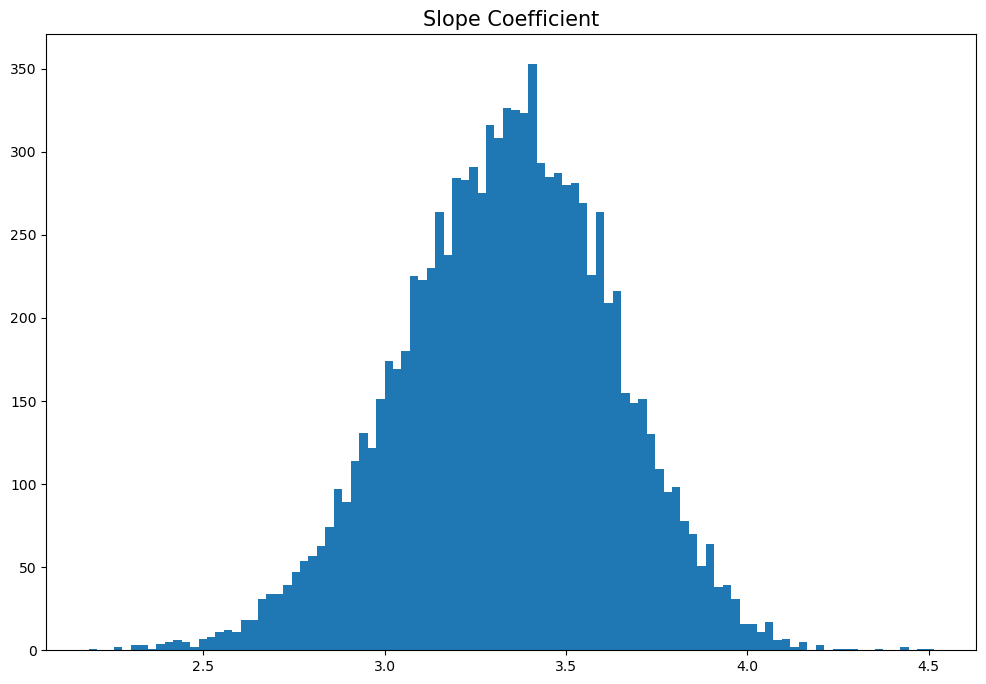

In [29]:
plt.figure(figsize = (12 ,8))
plt.hist(coeff[:, 0], bins = 100)
plt.title("Slope Coefficient", fontsize = 15)
plt.plot()

In [30]:
# Get 95% confidence intervals for the slope coefficient
np.percentile(coeff[:, 0], [2.5, 97.5])

array([2.74, 3.89])

[]

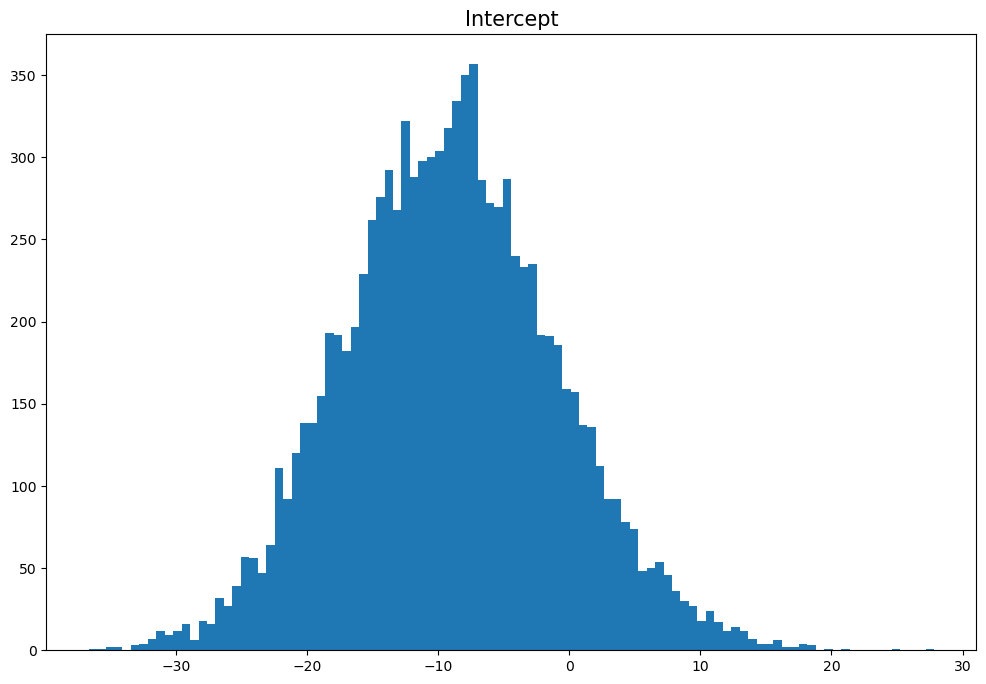

In [31]:
plt.figure(figsize = (12 ,8))
plt.hist(coeff[:, 1], bins = 100)
plt.title("Intercept", fontsize = 15)
plt.plot()

In [32]:
np.percentile(coeff[:, 1], [2.5, 97.5])

array([-24.57,   7.51])

#### visualise all regression lines from bootstrap samples

In [ ]:
x = np.array([df.budget.min(), df.budget.max()])
x

array([  0., 250.])

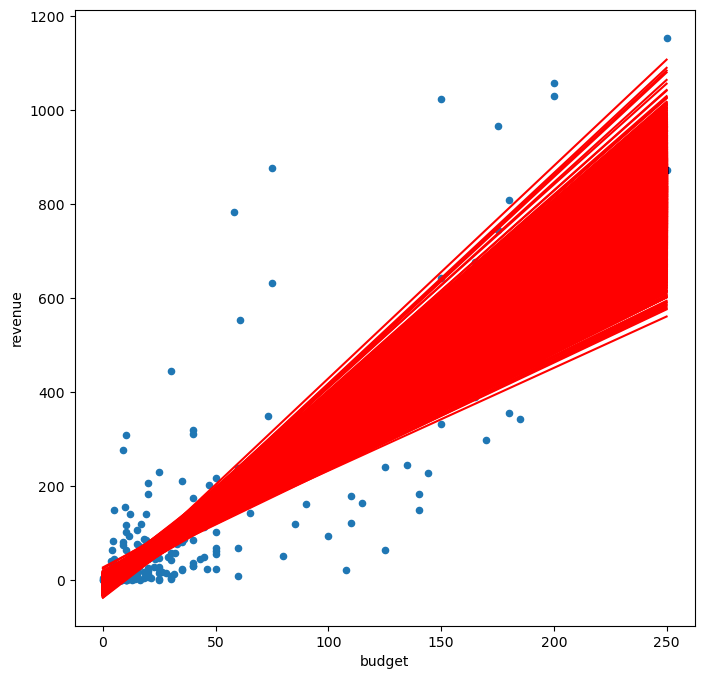

In [ ]:
# 10K regression lines from bootstrap samples
df.iloc[:,-2:].plot(kind = "scatter", x = "budget", y = "revenue", figsize = (8, 8))
for i in range(sims):
    y = np.polyval(coeff[i], x)
    plt.plot(x,y, color = "red")
plt.show()

In [35]:
import seaborn as sns

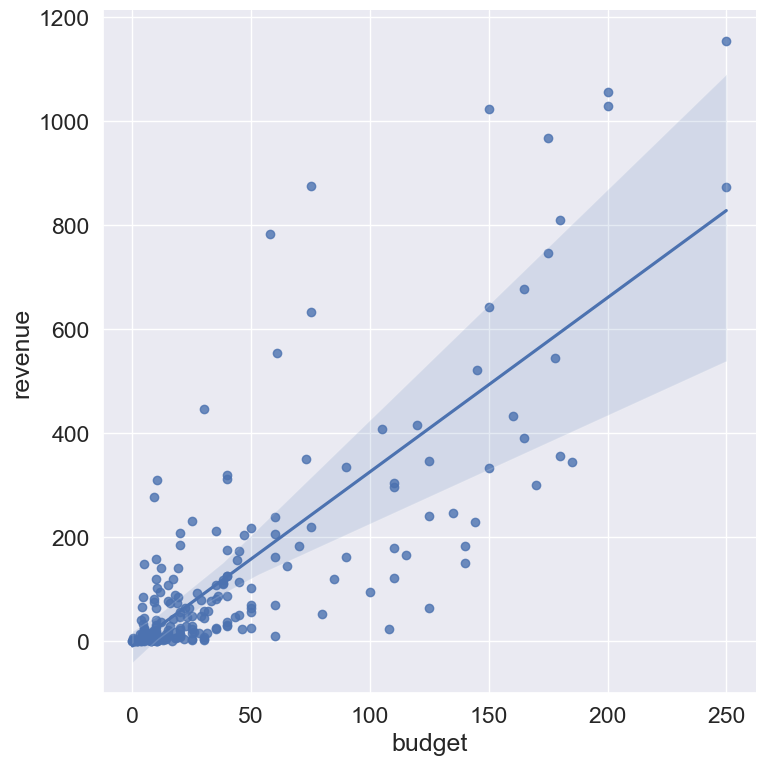

In [ ]:
sns.set(font_scale=1.5)
sns.lmplot(data = df, x = "budget", y = "revenue", height = 8, n_boot = 10000, ci = 100) # 100% confidence interval - can change ci to 95 for 95% confidence interval
plt.show()

## Hypothesis Testing of Regression Coefficients
T-test: Test if independent variable budget significantly explains the dependent variable revenue and the intercept is significantly different from zero<br>
Ho: intercept 'a' = 0 <br>
Ha: intercept 'a' does not = 0 <br>

In [37]:
import pandas as pd
from statsmodels.formula.api import ols
pd.options.display.float_format = '{:.10f}'.format

In [38]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [ ]:
df = df.loc["2016"]

In [39]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,0.1000000000,11.0000000000
1915-12-13,The Cheat,0.0173110000,0.1373650000
1916-12-24,"20,000 Leagues Under the Sea",0.2000000000,8.0000000000
1918-08-01,Mickey,0.2500000000,8.0000000000
1921-01-21,The Kid,0.2500000000,2.5000000000
...,...,...,...
2017-07-26,Atomic Blonde,30.0000000000,90.0079450000
2017-07-28,The Emoji Movie,50.0000000000,66.9139390000
2017-08-03,The Dark Tower,60.0000000000,71.0000000000


In [40]:
model = ols("revenue ~ budget", data = df)

In [41]:
results = model.fit()

In [42]:
results.params

Intercept   -3.6173624059
budget       3.0209391249
dtype: float64

In [43]:
results.rsquared

np.float64(0.5332954659996271)

In [44]:
results.tvalues

Intercept   -1.8483560351
budget      78.3995748936
dtype: float64

In [45]:
results.pvalues

Intercept   0.0646057051
budget      0.0000000000
dtype: float64

p-value of budget = 0: Reject the null-hypothesis that the slope coefficient is = 0. Therefore the independent variable (budget) is a significant predictor of the dependent variable (revenue)

## Hypothesis Testing with statsmodels – interpreting the Summary Table

In [46]:
import pandas as pd
from statsmodels.formula.api import ols

In [47]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [48]:
df = df.loc["2016"]

In [49]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0000000000,1.3972840000
2016-01-07,Friend Request,9.9000000000,2.4000000000
2016-01-07,The Forest,10.0000000000,40.0554390000
2016-01-07,Wazir,5.2000000000,9.2000000000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0000000000,69.4113700000
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0000000000,312.2426260000
2016-12-23,Railroad Tigers,50.0000000000,102.2051750000
2016-12-23,Dangal,10.4000000000,310.0000000000


In [50]:
model = ols("revenue ~ budget", data=df)

In [51]:
results = model.fit()

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     414.6
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           1.24e-53
Time:                        07:54:47   Log-Likelihood:                -1475.3
No. Observations:                 235   AIC:                             2955.
Df Residuals:                     233   BIC:                             2961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.4492     10.751     -0.879      0.380     -30.631      11.732
budget         3.3494      0.164     20.362      0.000       3.025       3.674
==============================================================================
Omnibus:                       95.272   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.458
Skew:                           1.547   Prob(JB):                    2.55e-103
Kurtosis:                       9.220   Cond. No.                         83.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     414.6
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           1.24e-53
Time:                        07:54:51   Log-Likelihood:                -1475.3
No. Observations:                 235   AIC:                             2955.
Df Residuals:                     233   BIC:                             2961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.4492     10.751     -0.879      0.3

p-value of Intercept 0.380: Fail to reject null-hypothesis for the intercept that the intercept is equal to zero<br>
p-value of budget 0.000: Reject the null-pypothesis for the slope coefficient of the buget is not equal to zero with statistical significance<br>
Confidence interval estimates of with a degree of confidence of 5% [1 - (.975-.025)]:<br>
* intercept is between -30.635 and 11.732<br>
* true slope coefficient is between 3.025 and 3.674<br> 